# Data Visualization - EDA and the grammar of graphics


## Meet Team A


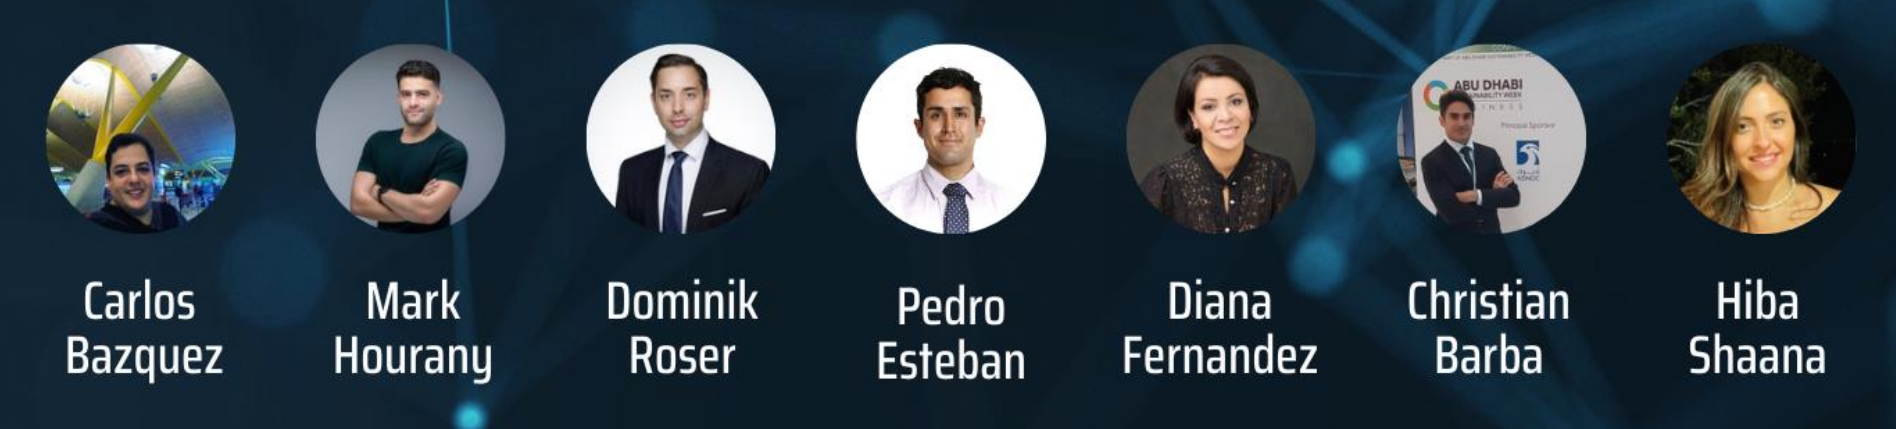

# <font color=black> Table of contents </font>


* [0. Synopsis and libraries](#0)
* [1. Importing Data](#1)
* [2. Preliminary Data Analysis](#2)  
  * [2.1.Data Wrangling](#2.1)
  * [2.2.Generating Aggregated Measures](#2.2)
* [3. Business Question](#3)
  * [3.1 Total Expenditure](#3.1)
      * [3.1.1 Pareto Analysis](#3.1.1)  
      * [3.1.2 Geographical Plot](#3.1.2) 
      * [3.1.3 Bar chart for Top 25 Countries Based on Total Expenses](#3.1.3) 
      * [3.1.4  Bar chart for Top 25 Countries Based on Total Expenses vs Product Category](#3.1.4) 
      * [3.1.5 Expenditure per Hour Top 25 Countries](#3.1.5) 
      * [3.1.6  Expenditure per Hour per Category](#3.1.6)    
  * [3.2 Credit Card Transaction Volume ](#3.2)  
      * [3.1.1 Pareto Analysis](#3.1.1)  
      * [3.1.2 Geographical Plot](#3.1.2) 
      * [3.1.3 Bar chart for Top 25 Countries Based on Total Expenses](#3.1.3) 
      * [3.1.4  Bar chart for Top 25 Countries Based on Total Expenses vs Product Category](#3.1.4) 
      * [3.1.5 Expenditure per Hour Top 25 Countries](#3.1.5) 
      * [3.1.6  Expenditure per Hour per Category](#3.1.6)   
  * [3.3 Checking Variable Completeness ](#3.3)
  * [3.4 Correlation Matrix ](#3.4)  
  * [3.5 Paired density, scatterplot matrix and 3D Graphics ](#3.5)   
  * [3.6 Categorial EDA ](#3.6) 
      * [3.6.1 Categorial Bar Diagrams](#3.6.1)  
      * [3.6.2.Violinplot with Dependent Variable](#3.6.2)  
      * [3.6.3.Treemap for categorial Data](#3.6.3) 
* [4. Annex](#4)
  * [4.1 Treemaps](#3.1)

<a id='0'></a>
# <font color=black> 0. Synopsis and Libraries </font>

Before opening their APIs to the public, CitiBank's Chief Digital Officer is keen in exploring new revenue streams to monetize the larges amount of data they've been historically collecting. He knows other financial institutions are doing business with their data, but he still needs to define specific use cases in which his credit card transaction data can add real value. As Senior Data Scientists, the CDO assigns you with the key task of exploring in depth the data stored in your data centers and make a solid assessment of the real value provided by it. You will present this business case in Citibank's annual convention. 

### Pip Installs (as raw nbconvert)

### Imports

In [9]:
from plotnine import *
from plotnine import ggplot, geom_map, aes, scale_fill_cmap, theme, labs
from plotnine.data import mpg
import pandas as pd
import numpy as np
import plotnine as p9
import squarify
%matplotlib inline
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.io as pio
import os
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

<a id='1'></a>
# <font color=black> 1. Importing Data </font>    

In [10]:
df = pd.read_csv ("madrid_transactions.csv", index_col=0)
countries = pd.read_csv ("country-and-continent-codes-list.csv")
df = df.merge(countries, left_on="customer_country", right_on="Two_Letter_Country_Code")

df.tx_date_proc = df.tx_date_proc.apply(pd.to_datetime)
df['Day'] = [d.date() for d in df['tx_date_proc']]
df['Time'] = [d.time() for d in df['tx_date_proc']]

country_code = pd.read_csv ("all.csv")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

The dataset provided contains more than 10,000 credit card transactions performed by tourists in the city of Madrid during a month. CitiBank's DBA has already cleaned the file and uploaded it to the Campus Online, so you can solely focus on analyzing the different consumption patterns from tourists. The goal is to discover different insights from the data through data visualization (with GGPlot2) and then transform them into potential business outcomes. 

<a id='2'></a>
# <font color=black> 2. Preliminary Data Analysis </font>    

In [13]:
df.head()

amount            category customer_country    daytime  hour  \
0   33.46     Fashion & Shoes               GB      Night    21   
1   59.97     Fashion & Shoes               GB  Afternoon    16   
2    5.95     Fashion & Shoes               GB    Evening    17   
3   19.95     Fashion & Shoes               GB  Afternoon    16   
4    5.80  Bars & restaurants               GB    Morning     8   

               tx_date_proc    weekday Continent_Name Continent_Code  \
0 2012-03-01 21:51:54+00:00  thursday          Europe             EU   
1 2012-03-02 16:12:52+00:00  friday            Europe             EU   
2 2012-03-01 17:43:29+00:00  thursday          Europe             EU   
3 2012-03-01 16:33:57+00:00  thursday          Europe             EU   
4 2012-03-01 08:59:43+00:00  thursday          Europe             EU   

                                        Country_Name Two_Letter_Country_Code  \
0  United Kingdom of Great Britain & Northern Ire...                      GB   
1  United Kingdom of Great Britain & Northern Ire...                      GB   
2  United Kingdom of Great Britain & Northern Ire...                      GB   
3  United Kingdom of Great Britain & Northern Ire...                      GB   
4  United Kingdom of Great Britain & Northern Ire...                      GB   

  Three_Letter_Country_Code  Country_Number         Day      Time  
0                       GBR           826.0  2012-03-01  21:51:54  
1                       GBR           826.0  2012-03-02  16:12:52  
2                       GBR           826.0  2012-03-01  17:43:29  
3                       GBR           826.0  2012-03-01  16:33:57  
4                       GBR           826.0  2012-03-01  08:59:43

In [14]:
df.tail()

amount            category customer_country    daytime  hour  \
11319   19.25  Bars & restaurants               MA  Afternoon    14   
11320  201.82   Culture & Leisure               MA       Dawn     3   
11321   65.85     Fashion & Shoes               MA    Evening    17   
11322   59.95     Fashion & Shoes               UG  Afternoon    12   
11323  264.95     Fashion & Shoes               UG  Afternoon    12   

                   tx_date_proc    weekday Continent_Name Continent_Code  \
11319 2012-03-01 14:31:17+00:00  thursday          Africa             AF   
11320 2012-03-02 03:26:27+00:00  friday            Africa             AF   
11321 2012-03-01 17:50:43+00:00  thursday          Africa             AF   
11322 2012-03-01 12:35:50+00:00  thursday          Africa             AF   
11323 2012-03-01 12:39:00+00:00  thursday          Africa             AF   

              Country_Name Two_Letter_Country_Code Three_Letter_Country_Code  \
11319  Morocco, Kingdom of                      MA                       MAR   
11320  Morocco, Kingdom of                      MA                       MAR   
11321  Morocco, Kingdom of                      MA                       MAR   
11322  Uganda, Republic of                      UG                       UGA   
11323  Uganda, Republic of                      UG                       UGA   

       Country_Number         Day      Time  
11319           504.0  2012-03-01  14:31:17  
11320           504.0  2012-03-02  03:26:27  
11321           504.0  2012-03-01  17:50:43  
11322           800.0  2012-03-01  12:35:50  
11323           800.0  2012-03-01  12:39:00

In [15]:
df.describe()

amount          hour  Country_Number
count  11324.000000  11324.000000    11324.000000
mean     109.135373     15.040798      485.586983
std      307.014206      4.790397      281.919409
min        0.040000      0.000000       12.000000
25%       19.950000     12.000000      250.000000
50%       40.000000     16.000000      464.000000
75%       93.550000     18.000000      792.000000
max    15000.000000     23.000000      882.000000

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11324 entries, 0 to 11323
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   amount                     11324 non-null  float64            
 1   category                   11324 non-null  object             
 2   customer_country           11324 non-null  object             
 3   daytime                    11324 non-null  object             
 4   hour                       11324 non-null  int64              
 5   tx_date_proc               11324 non-null  datetime64[ns, UTC]
 6   weekday                    11324 non-null  object             
 7   Continent_Name             11324 non-null  object             
 8   Continent_Code             9083 non-null   object             
 9   Country_Name               11324 non-null  object             
 10  Two_Letter_Country_Code    11324 non-null  object             
 11  Th

In [17]:
df.dtypes

amount                                   float64
category                                  object
customer_country                          object
daytime                                   object
hour                                       int64
tx_date_proc                 datetime64[ns, UTC]
weekday                                   object
Continent_Name                            object
Continent_Code                            object
Country_Name                              object
Two_Letter_Country_Code                   object
Three_Letter_Country_Code                 object
Country_Number                           float64
Day                                       object
Time                                      object
dtype: object

In [18]:
report = ProfileReport(df, minimal=False)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a id='2.1'></a>
## <font color=black> 2.1. Data Wrangling </font>   

In [257]:
# Reducing Country name to only first word
df['Country_Name'] = df['Country_Name'].apply(lambda x: str(x).split(',')[0])
# Reducing United Kingdom of Great Britain & Northern Ireland to United Kingdom
df['Country_Name'] = df['Country_Name'].apply(lambda x: 'United Kingdom' if x == 'United Kingdom of Great Britain & Northern Ireland' else x)

In [258]:
# Traslating to English all purchase categories
df['category'] = df['category'].apply(lambda x: 'Travel Agency' if x == 'Agencias de viajes' else x)
df['category'] = df['category'].apply(lambda x: 'Home and reforms' if x == 'Hogar y reformas' else x)
df['category'] = df['category'].apply(lambda x: 'Automotive' if x == 'Automoción' else x)

<a id='2.2'></a>
## <font color=black> 2.2 Generating Aggregated Measures </font>  

In [259]:
df3 = df.merge(country_code, left_on="customer_country", right_on="alpha-2").groupby(['customer_country',"alpha-3", "Country_Name"])['amount'].sum().reset_index(name ='Total_Expenditure')
df4 = df.merge(country_code, left_on="customer_country", right_on="alpha-2").groupby(['customer_country',"alpha-3", "Country_Name"])['amount'].count().reset_index(name ='Total_Transactions')
df5 = df.merge(country_code, left_on="customer_country", right_on="alpha-2").groupby(['customer_country',"alpha-3", "Country_Name"])['amount'].mean().reset_index(name ='Avg_Ticket')
df_merged = df3.merge(df4, on=['customer_country', "alpha-3", "Country_Name"]).merge(df5, on=['customer_country', "alpha-3", "Country_Name"])
df_merged.sort_values(by="Total_Expenditure", ascending=False, inplace=True)
df_merged

customer_country alpha-3              Country_Name  Total_Expenditure  \
101               US     USA  United States of America          184196.77   
34                GB     GBR            United Kingdom           88681.40   
21                CN     CHN                     China           88411.51   
87                RU     RUS        Russian Federation           81202.64   
33                FR     FRA                    France           80338.06   
..               ...     ...                       ...                ...   
12                BO     BOL                   Bolivia              97.55   
46                IQ     IRQ                      Iraq              85.55   
2                 AM     ARM                   Armenia              56.00   
106               WS     WSM                     Samoa              30.13   
67                MW     MWI                    Malawi              14.90   

     Total_Transactions  Avg_Ticket  
101                1686  109.250753  
34                  848  104.577123  
21                  369  239.597588  
87                  670  121.197970  
33                 1239   64.841049  
..                  ...         ...  
12                    2   48.775000  
46                    1   85.550000  
2                     2   28.000000  
106                   1   30.130000  
67                    1   14.900000  

[109 rows x 6 columns]

<a id='3'></a>
# <font color=black> 3. Business Question </font>    

# _Who are our customers and what is their expending behaviour?_


<a id='3.1'></a>
## <font color=black> 3.1 Total Expenditure </font>    

<a id='3.1.1'></a>
### <font color=black> 3.1.1 Pareto Analysis </font>    

In [264]:
#Preparing df for pareto chart
df_merged['cumulative_sum'] = df_merged.Total_Expenditure.cumsum()
df_merged['cumulative_perc'] = 100*df_merged.cumulative_sum/df_merged.Total_Expenditure.sum()
df_merged.sort_values(by="Total_Expenditure", ascending=False, inplace=True)

In [271]:
# Pareto Chart Total Expenditure
trace_0 = go.Bar(
    x=df_merged["Country_Name"],
    y=df_merged["Total_Expenditure"],
    marker=dict(color=df_merged["Total_Expenditure"], coloraxis="coloraxis"),
    text=df_merged["Total_Expenditure"],
    textposition="outside",
    textfont=dict(color="black"),
    texttemplate='%{text:.3s}'
)

trace_1 = go.Scatter(
    x=df_merged["Country_Name"],
    y=df_merged["cumulative_perc"],
    mode="markers+lines"
)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(trace_0)

fig.add_trace(trace_1,secondary_y=True)

fig.update_layout(
    title="Figure1.Total Expenditure by Country of Origin <br><sup>Pareto Analysis: 80% of Credit Card Expenditure is done by 20% of nationalities</sup>",
    showlegend=False,
    coloraxis_showscale=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Total Expenditure", secondary_y=False),
fig.update_yaxes(title_text="Cummulative % Total Expenditure", secondary_y=True)

fig.show()

<a id='3.1.2'></a>
### <font color=black> 3.1.2 Geographical Plot </font>    

In [201]:
df6=df_merged.merge(world, left_on="alpha-3", right_on="iso_a3")

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\guides\guides.py:187: PlotnineWarning:

Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it



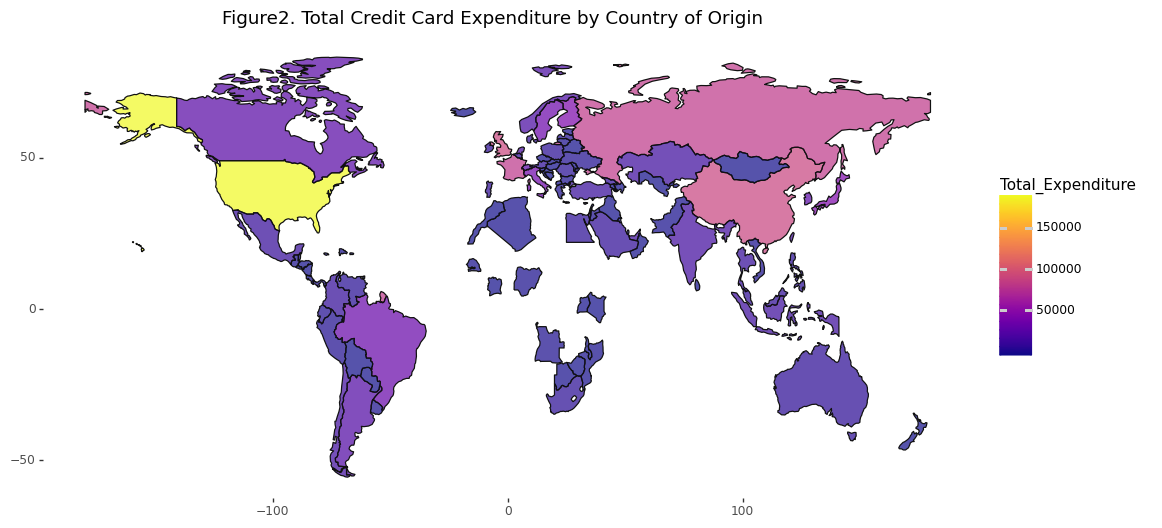

<ggplot: (152391098173)>

In [272]:
chart = ggplot(df6, mapping=aes(fill="Total_Expenditure"))
map_proj = geom_map(alpha = 0.7)
labels = labs(title="Figure2. Total Credit Card Expenditure by Country of Origin")
theme_details = theme(figure_size=(12,6))
fill_colormap = scale_fill_cmap(cmap_name="plasma")
color_colormap = scale_color_cmap(cmap_name="plasma")
world_map_card = chart + map_proj + labels + theme_details + fill_colormap + color_colormap + theme(panel_background = element_blank())
world_map_card

In [203]:
#Selecting Top XX nationalities
# number of top-n you want
n = 25

# group by & sort descending
df_sorted = (df6
                .groupby('Country_Name').sum()
                .sort_values('Total_Expenditure', ascending=False)
                .reset_index()
            )
# rename rows other than top-n to 'Others'
df_sorted.loc[df_sorted.index >= n, 'Country_Name'] = 'Others'

df_sorted = df_sorted.loc[df_sorted['Country_Name'] != 'Others']
# re-group by again
#df_sorted.groupby('customer_country').mean()

C:\Users\dianaf\AppData\Local\Temp\ipykernel_15208\307745179.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<a id='3.1.3'></a>
### <font color=black> 3.1.3 Bar chart for Top 25 Countries Based on Total Expenses </font>    

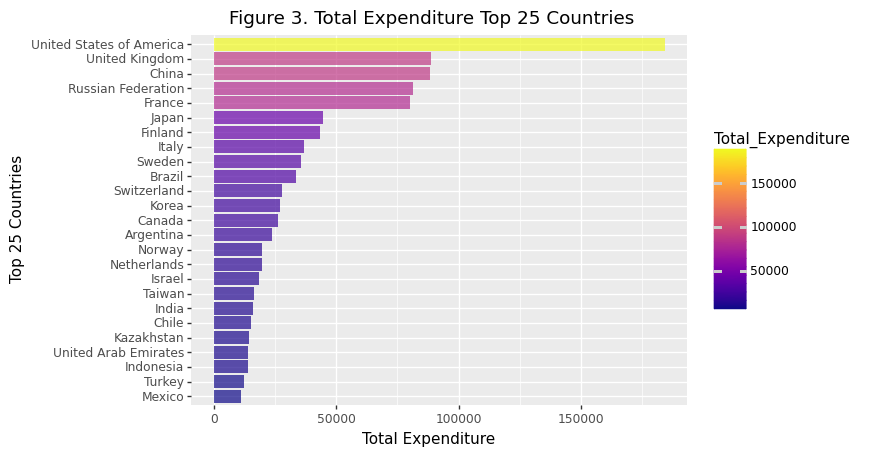

<ggplot: (152391498834)>

In [279]:
#Bar Chart for top 25 countries ordered by total expenses
ggplot(df_sorted, aes(x = 'reorder(Country_Name, Total_Expenditure, fun=sum)', y = 'Total_Expenditure', fill='Total_Expenditure'))\
    + geom_bar(stat="identity",alpha = 0.7)\
        + scale_x_discrete()\
            + coord_flip()\
                +scale_fill_cmap(cmap_name="plasma")\
                    + ggtitle("Figure 3. Total Expenditure Top 25 Countries")\
                        +labs(y= "Total Expenditure ", x = "Top 25 Countries")                            

<a id='3.1.4'></a>
### <font color=black> 3.1.4 Bar chart for Top 25 Countries Based on Total Expenses vs Product Category </font>  


In [205]:
df7 = pd.merge(left=df, right=df_sorted[['Country_Name','Total_Expenditure']], on ='Country_Name', how ='left')
df7['Total_Expenditure'].fillna('Other', inplace=True)
df7['Total_Expenditure'] = np.where(df7['Total_Expenditure'] != 'Other', df7['Country_Name'], 'Other')
df7.rename(columns = {'Total_Expenditure':'Top_Expenditure'}, inplace = True)
df7 = df7.loc[df7['Top_Expenditure'] != 'Other']

In [206]:
df7_pivot = pd.pivot_table(df7, index=['customer_country', 'category'], values='amount', aggfunc=['sum']).reset_index()
df7_pivot1 = df7_pivot.reset_index()
df7_pivot1.columns = ['id','customer_country', 'category', 'amount']

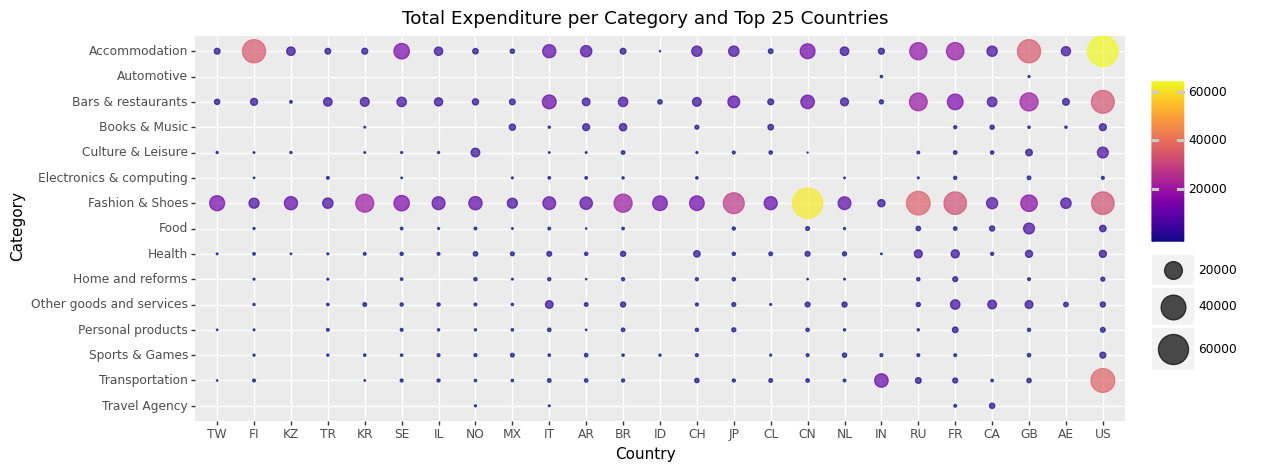

<ggplot: (152391388575)>

In [207]:
ggplot(df7_pivot1, aes(x='reorder(customer_country, amount)', y='category')) +\
  geom_point(aes(size='amount', color = 'amount'),alpha = 0.7)+\
    theme(legend_title = element_blank())+\
      scale_color_cmap(cmap_name="plasma")+\
          scale_y_discrete(limits=reversed)+\
            scale_size(range=(0,12))+\
              ggtitle("Total Expenditure per Category and Top 25 Countries")+\
                labs(y= "Category", x = "Country")+\
                  theme(figure_size=(12, 5)) 

<a id='3.1.5'></a>
### <font color=black> 3.1.5 Expenditure per Hour Top 25 Countries </font>  


In [208]:
df7_pivot2 = pd.pivot_table(df7, index=['customer_country', 'hour'], values='amount', aggfunc=['sum']).reset_index()
df7_pivot2 = df7_pivot2.reset_index()
df7_pivot2.columns = ['id','customer_country', 'hour', 'amount']

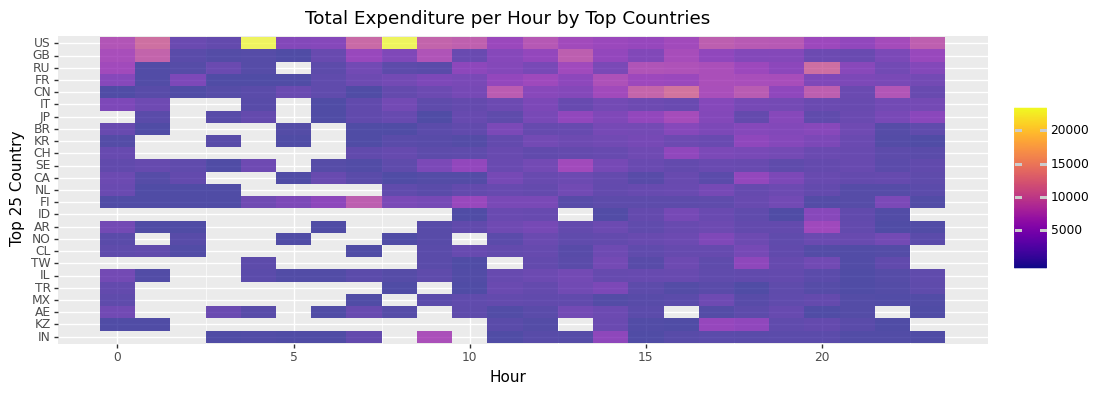

<ggplot: (152394651249)>

In [209]:
ggplot(df7_pivot2)+geom_tile(aes(x='hour', y='reorder(customer_country,amount)', fill="amount"),alpha = 0.7)+\
    scale_fill_cmap(cmap_name="plasma")+\
        theme(legend_title = element_blank())+\
            ggtitle("Total Expenditure per Hour by Top Countries")+\
                labs(y= "Top 25 Country", x = "Hour")+\
                    theme(figure_size=(12, 4))

<a id='3.1.6'></a>
### <font color=black> 3.1.6 Expenditure per Hour per Category </font>  

In [210]:
df7_pivot3 = pd.pivot_table(df7, index=['category', 'hour'], values='amount', aggfunc=['sum']).reset_index()
df7_pivot3 = df7_pivot3.reset_index()
df7_pivot3.columns = ['id','category', 'hour', 'amount']

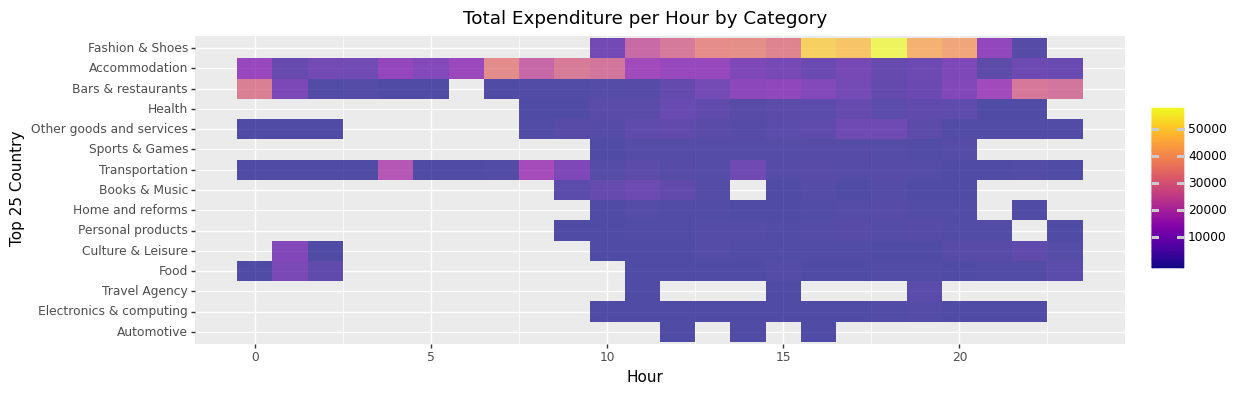

<ggplot: (152388134258)>

In [211]:
ggplot(df7_pivot3)+geom_tile(aes(x='hour', y='reorder(category,amount)', fill="amount"),alpha = 0.7)+\
    scale_fill_cmap(cmap_name="plasma")+\
        theme(legend_title = element_blank())+\
            ggtitle("Total Expenditure per Hour by Category")+\
                labs(y= "Top 25 Country", x = "Hour")+\
                    theme(figure_size=(12, 4))

<a id='3.2'></a>
## <font color=black> 3.2 Credit Card Transaction Volume  </font>  


### Pareto Analysis

In [277]:
#Preparing df for pareto chart
df_transc =df_merged.copy()
df_transc['cumulative_sum_tran'] = df_transc.Total_Transactions.cumsum()
df_transc['cumulative_perc_tran'] = 100*df_transc.cumulative_sum_tran/df_transc.Total_Transactions.sum()
df_transc.sort_values(by="Total_Transactions", ascending=False, inplace=True)

In [278]:
# Pareto Chart Total Expenditure
trace_2 = go.Bar(
    x=df_transc["Country_Name"],
    y=df_transc["Total_Transactions"],
    marker=dict(color=df_transc["Total_Transactions"], coloraxis="coloraxis"),
    text=df_transc["Total_Transactions"],
    textposition="outside",
    textfont=dict(color="black"),
    texttemplate='%{text:.3s}'
)

trace_3 = go.Scatter(
    x=df_merged["Country_Name"],
    y=df_merged["cumulative_perc_tran"],
    mode="markers+lines"
)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(trace_2)

fig.add_trace(trace_3,secondary_y=True)

fig.update_layout(
    title="Pareto Analysis: Total Transactions by Country of Origin",
    showlegend=False,
    coloraxis_showscale=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Total Transactions", secondary_y=False),
fig.update_yaxes(title_text="Cummulativee % Total Transactions", secondary_y=True)

fig.show()

### Geographical plot

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\guides\guides.py:187: PlotnineWarning:

Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it



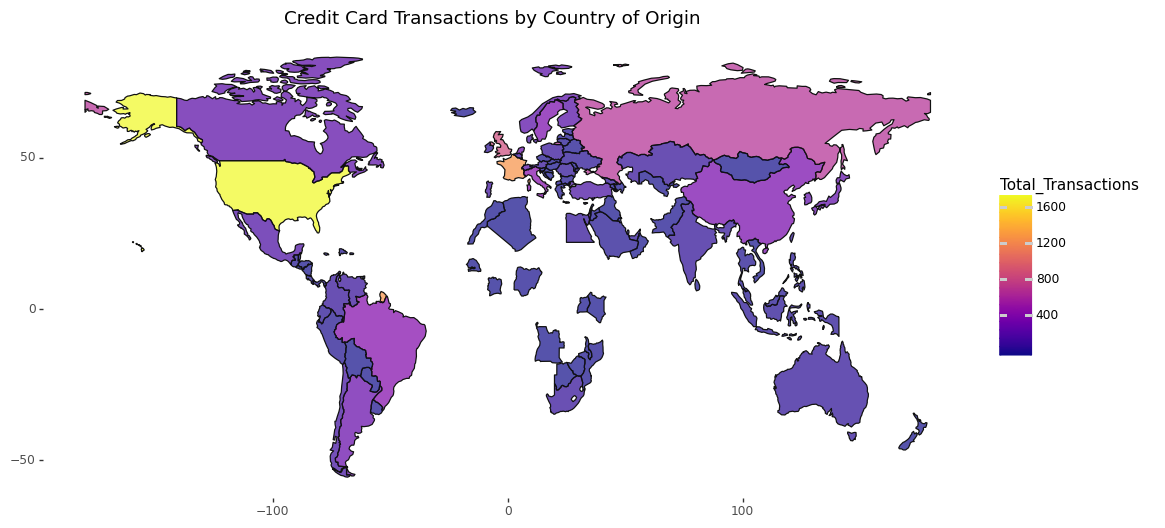

<ggplot: (152394300852)>

In [214]:
chart = ggplot(df6, mapping=aes(fill="Total_Transactions"))
map_proj = geom_map(alpha = 0.7)
labels = labs(title="Credit Card Transactions by Country of Origin")
theme_details = theme(figure_size=(12,6))
fill_colormap = scale_fill_cmap(cmap_name="plasma")
color_colormap = scale_color_cmap(cmap_name="plasma")
world_map_card = chart + map_proj + labels + theme_details + fill_colormap + color_colormap + theme(panel_background = element_blank())
world_map_card

In [215]:
#Selecting Top XX nationalities
# number of top-n you want
n = 25

# group by & sort descending
df_sorted_tran = (df6
                .groupby('Country_Name').sum()
                .sort_values('Total_Transactions', ascending=False)
                .reset_index()
            )
# rename rows other than top-n to 'Others'
df_sorted_tran.loc[df_sorted_tran.index >= n, 'Country_Name'] = 'Others'

df_sorted_tran = df_sorted_tran.loc[df_sorted_tran['Country_Name'] != 'Others']
# re-group by again
#df_sorted.groupby('customer_country').mean()

C:\Users\dianaf\AppData\Local\Temp\ipykernel_15208\3798371143.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



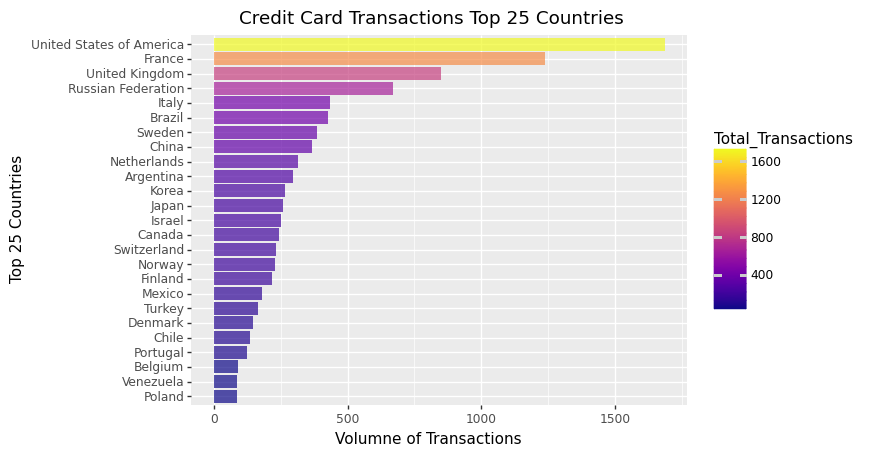

<ggplot: (152396313234)>

In [216]:
#Bar Chart for top 25 countries ordered by volume of transactions
ggplot(df_sorted_tran, aes(x = 'reorder(Country_Name, Total_Transactions, fun=sum)', y = 'Total_Transactions', fill='Total_Transactions'))\
    + geom_bar(stat="identity",alpha = 0.7)\
        + scale_x_discrete()\
            + coord_flip()\
                +scale_fill_cmap(cmap_name="plasma")\
                    + ggtitle("Credit Card Transactions Top 25 Countries")\
                        +labs(y= "Volumne of Transactions ", x = "Top 25 Countries")\
                            + guides(color=guide_legend(title='Volume'))

In [217]:
df8 = pd.merge(left=df, right=df_sorted_tran[['Country_Name','Total_Transactions']], on ='Country_Name', how ='left')
df8['Total_Transactions'].fillna('Other', inplace=True)
df8['Total_Transactions'] = np.where(df8['Total_Transactions'] != 'Other', df['Country_Name'], 'Other')
df8.rename(columns = {'Total_Transactions':'Top_Transactions'}, inplace = True)
df8 = df8.loc[df8['Top_Transactions'] != 'Other']

In [218]:
df8_pivot = pd.pivot_table(df8, index=['customer_country', 'category'], values='amount', aggfunc=['count']).reset_index()
df8_pivot1 = df8_pivot.reset_index()
df8_pivot1.columns = ['id','customer_country', 'category', 'count']

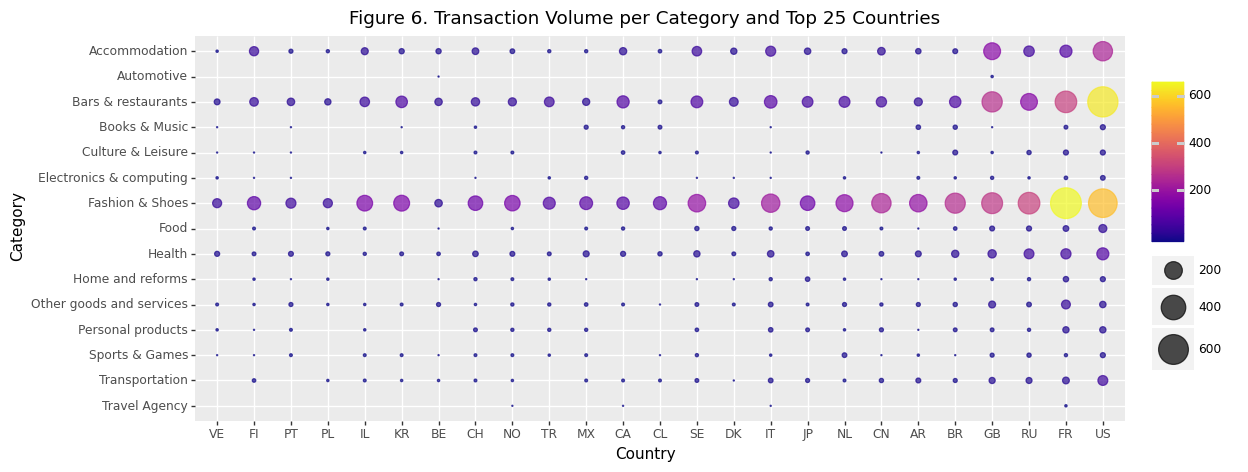

<ggplot: (152396793196)>

In [288]:
ggplot(df8_pivot1, aes(x='reorder(customer_country, count)', y='category')) +\
  geom_point(aes(size='count', color = 'count'),alpha = 0.7)+\
    theme(legend_title = element_blank())+\
      scale_color_cmap(cmap_name="plasma")+\
          scale_y_discrete(limits=reversed)+\
            scale_size(range=(0,12))+\
              ggtitle("Figure 6. Transaction Volume per Category and Top 25 Countries")+\
                labs(y= "Category", x = "Country")+\
                  theme(figure_size=(12, 5)) 

### Transaction Volume per Hour Top 25 Countries

In [220]:
df8_pivot2 = pd.pivot_table(df8, index=['customer_country', 'hour'], values='amount', aggfunc=['count']).reset_index()
df8_pivot2 = df8_pivot2.reset_index()
df8_pivot2.columns = ['id','customer_country', 'hour', 'count']

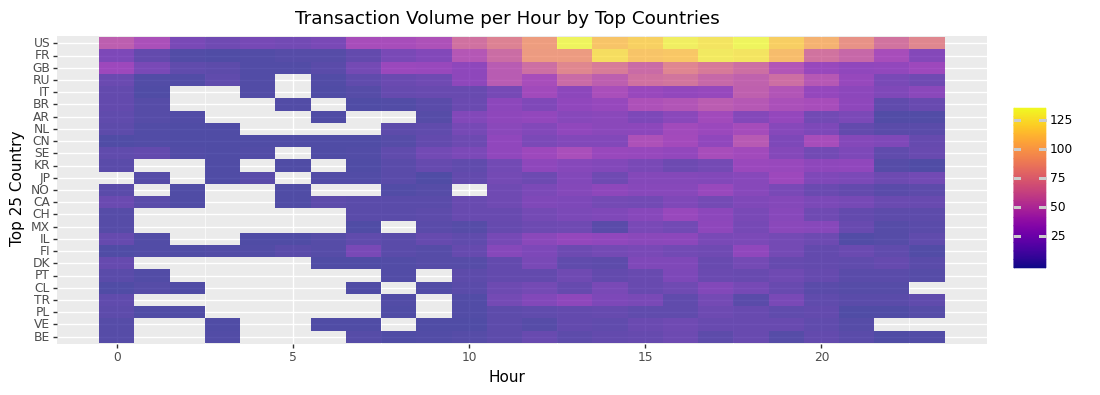

<ggplot: (152394170753)>

In [290]:
ggplot(df8_pivot2)+geom_tile(aes(x='hour', y='reorder(customer_country,count)', fill="count"),alpha = 0.7)+\
    scale_fill_cmap(cmap_name="plasma")+\
        theme(legend_title = element_blank())+\
            ggtitle("Transaction Volume per Hour by Top Countries")+\
                labs(y= "Top 25 Country", x = "Hour")+\
                    theme(figure_size=(12, 4))

### Transaction Volume per Category

In [222]:
df8_pivot3 = pd.pivot_table(df8, index=['category', 'hour'], values='amount', aggfunc=['count']).reset_index()
df8_pivot3 = df8_pivot3.reset_index()
df8_pivot3.columns = ['id','category', 'hour', 'count']

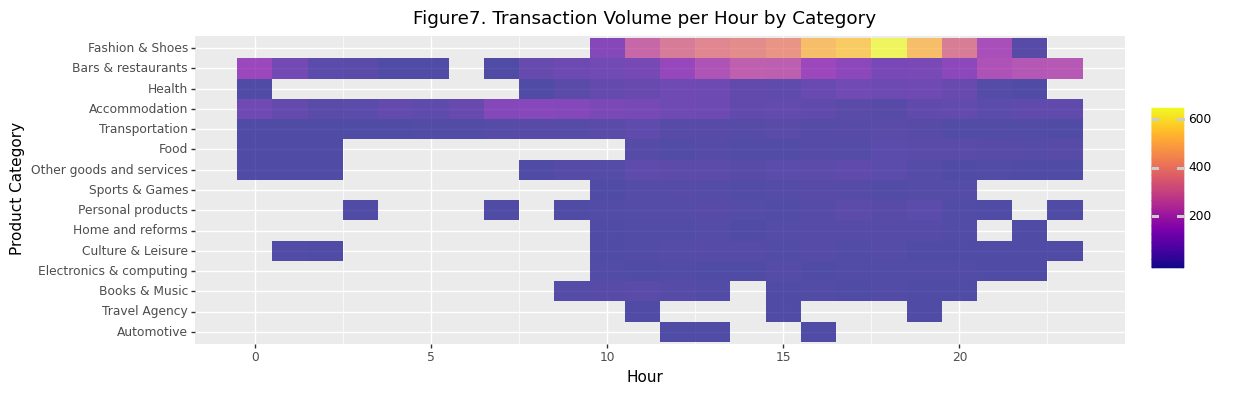

<ggplot: (152394083422)>

In [291]:
ggplot(df8_pivot3)+geom_tile(aes(x='hour', y='reorder(category,count)', fill="count"),alpha = 0.7)+\
    scale_fill_cmap(cmap_name="plasma")+\
        theme(legend_title = element_blank())+\
            ggtitle("Figure7. Transaction Volume per Hour by Category")+\
                labs(y= "Product Category", x = "Hour")+\
                    theme(figure_size=(12, 4))

## Average Ticket Size

### Geographical plot

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\guides\guides.py:187: PlotnineWarning:

Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it



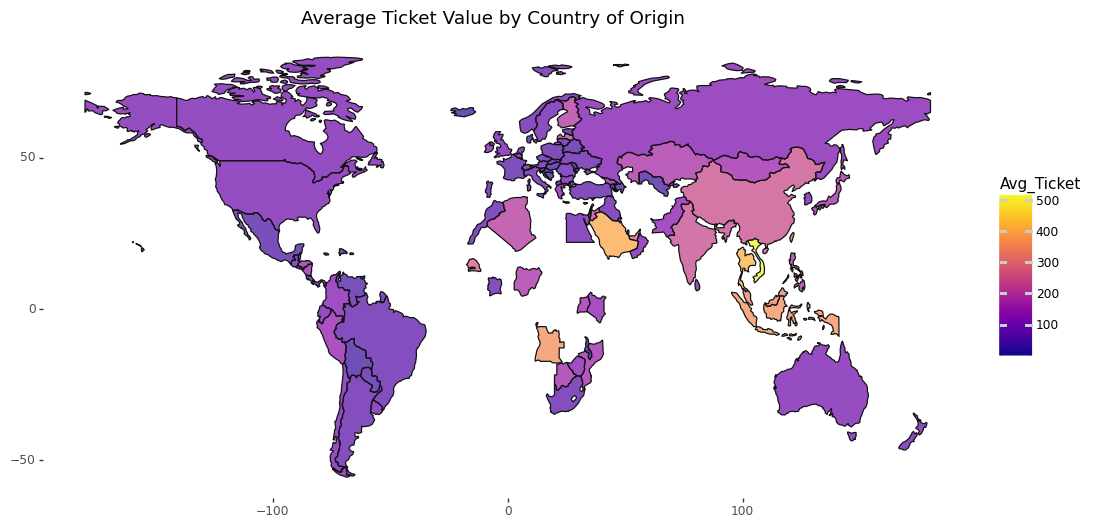

<ggplot: (152393863364)>

In [224]:
chart = ggplot(data=df6, mapping=aes(fill="Avg_Ticket"))
map_proj = geom_map(alpha = 0.7)
labels = labs(title="Average Ticket Value by Country of Origin")
theme_details = theme(figure_size=(12,6))
fill_colormap = scale_fill_cmap(cmap_name="plasma")
color_colormap = scale_color_cmap(cmap_name="plasma")
world_map_card = chart + map_proj + labels + theme_details + fill_colormap + color_colormap + theme(panel_background = element_blank())
world_map_card

In [225]:
#Selecting Top XX nationalities
# number of top-n you want
n = 25

# group by & sort descending
df_sorted_avg = (df6
                .groupby('customer_country').sum()
                .sort_values('Avg_Ticket', ascending=False)
                .reset_index()
            )
# rename rows other than top-n to 'Others'
df_sorted_avg.loc[df_sorted_avg.index >= n, 'customer_country'] = 'Others'

df_sorted_avg1 = df_sorted_avg.loc[df_sorted_avg['customer_country'] != 'Others']
# re-group by again
#df_sorted.groupby('customer_country').mean()

C:\Users\dianaf\AppData\Local\Temp\ipykernel_15208\1371767604.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



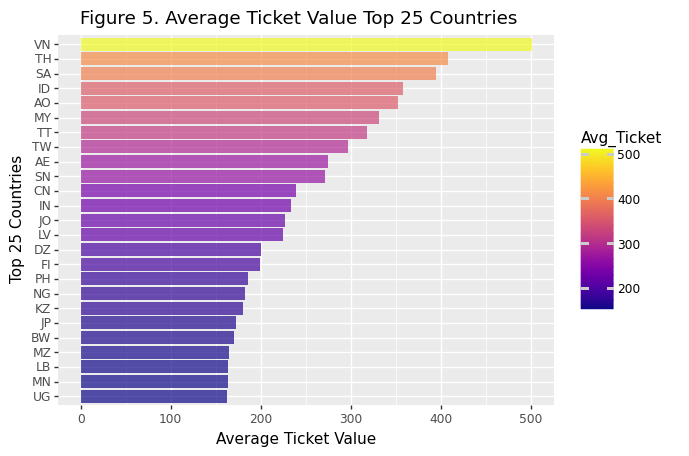

<ggplot: (152394050200)>

In [287]:
#Bar Chart for top 25 countries ordered by Average Ticket Value
ggplot(df_sorted_avg1, aes(x = 'reorder(customer_country, Avg_Ticket, fun=sum)', y = 'Avg_Ticket', fill='Avg_Ticket'))\
    + geom_bar(stat="identity",alpha = 0.7)\
        + scale_x_discrete()\
            + coord_flip()\
                +scale_fill_cmap(cmap_name="plasma")\
                    + ggtitle("Figure 5. Average Ticket Value Top 25 Countries")\
                        +labs(y= "Average Ticket Value ", x = "Top 25 Countries")\
                            + guides(color=guide_legend(title='Avg Ticket Value'))

In [227]:
df9 = pd.merge(left=df, right=df_sorted_avg1[['customer_country','Avg_Ticket']], on ='customer_country', how ='left')
df9['Avg_Ticket'].fillna('Other', inplace=True)
df9['Avg_Ticket'] = np.where(df9['Avg_Ticket'] != 'Other', df9['customer_country'], 'Other')
df9.rename(columns = {'Avg_Ticket':'Top_Ticket'}, inplace = True)
df9 = df9.loc[df9['Top_Ticket'] != 'Other']

In [228]:
df9_pivot = pd.pivot_table(df9, index=['Top_Ticket', 'category'], values='amount', aggfunc=['mean']).reset_index()
df9_pivot1 = df9_pivot.reset_index()
df9_pivot1.columns = ['id','Top_Ticket', 'category', 'mean']

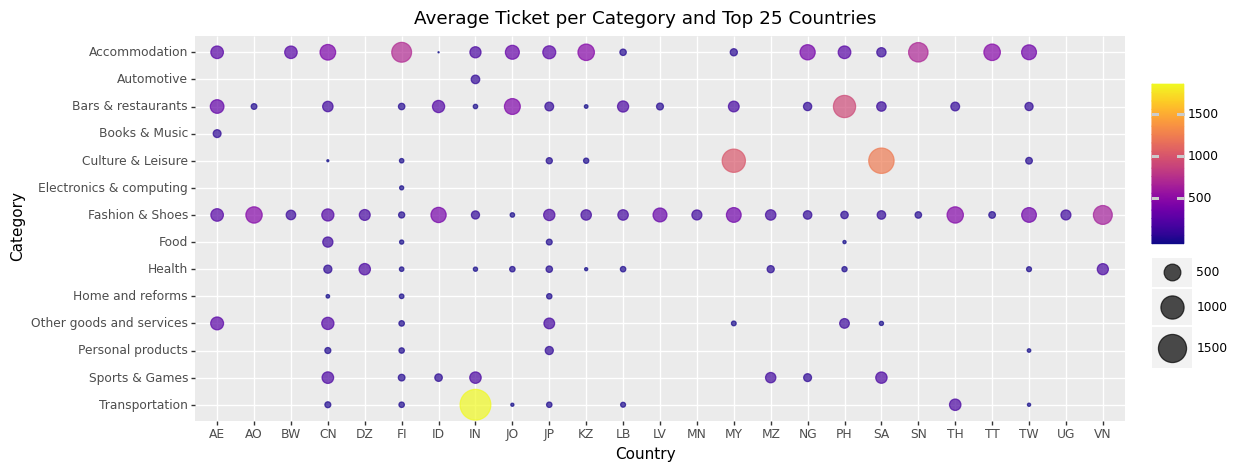

<ggplot: (152394160744)>

In [229]:
ggplot(df9_pivot1, aes('Top_Ticket', 'category')) +\
  geom_point(aes(size='mean', color = 'mean'),alpha = 0.7)+\
    theme(legend_title = element_blank())+\
      scale_color_cmap(cmap_name="plasma")+\
        scale_y_discrete(limits=reversed)+\
          scale_size(range=(0,12))+\
            ggtitle("Average Ticket per Category and Top 25 Countries")+\
              labs(y= "Category", x = "Country")+\
                theme(figure_size=(12, 5)) 

### Average Ticket Size per Hour Top 25 Countries

In [230]:
df9_pivot2 = pd.pivot_table(df9, index=['customer_country', 'hour'], values='amount', aggfunc=['mean']).reset_index()
df9_pivot2 = df9_pivot2.reset_index()
df9_pivot2.columns = ['id','customer_country', 'hour', 'mean']

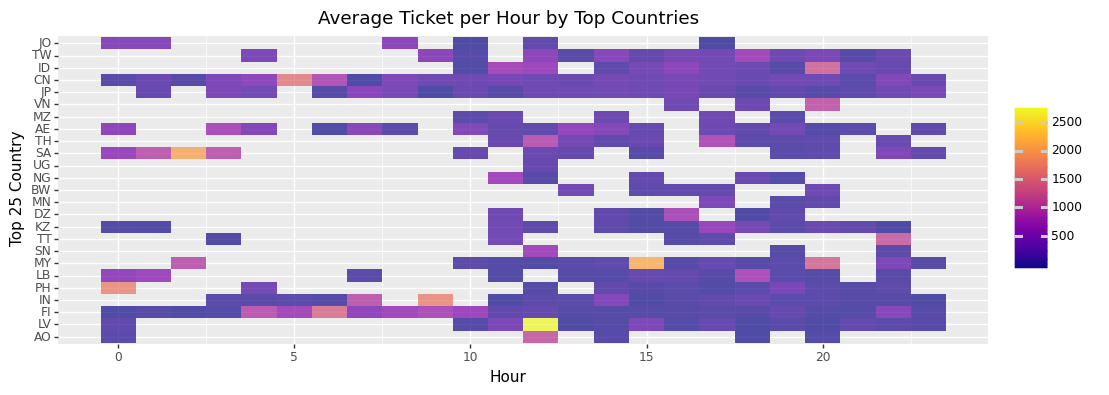

<ggplot: (152391698030)>

In [231]:
ggplot(df9_pivot2)+geom_tile(aes(x='hour', y='reorder(customer_country,mean)', fill="mean"),alpha = 0.7)+\
    scale_fill_cmap(cmap_name="plasma")+\
        theme(legend_title = element_blank())+\
            ggtitle("Average Ticket per Hour by Top Countries")+\
                labs(y= "Top 25 Country", x = "Hour")+\
                    theme(figure_size=(12, 4))

### Average Ticket per Category

In [232]:
df9_pivot3 = pd.pivot_table(df9, index=['category', 'hour'], values='amount', aggfunc=['mean']).reset_index()
df9_pivot3 = df9_pivot3.reset_index()
df9_pivot3.columns = ['id','category', 'hour', 'mean']

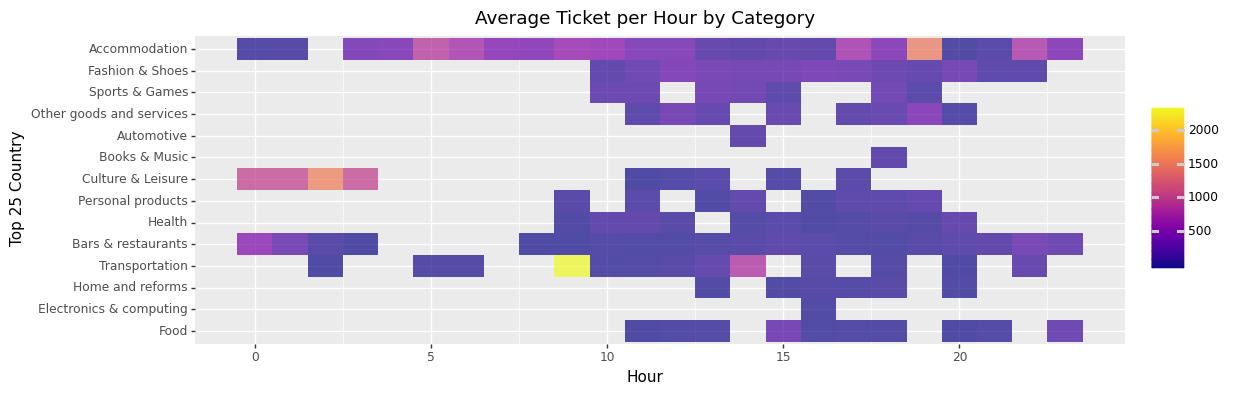

<ggplot: (152392157419)>

In [233]:
ggplot(df9_pivot3)+geom_tile(aes(x='hour', y='reorder(category,mean)', fill="mean"),alpha = 0.7)+\
    scale_fill_cmap(cmap_name="plasma")+\
        theme(legend_title = element_blank())+\
            ggtitle("Average Ticket per Hour by Category")+\
                labs(y= "Top 25 Country", x = "Hour")+\
                    theme(figure_size=(12, 4))

In [234]:
df9_pivot4 = pd.pivot_table(df9, index=['category'], values='amount', aggfunc=['mean']).reset_index()
df9_pivot4 = df9_pivot4.reset_index()
df9_pivot4.columns = ['id','category', 'mean']

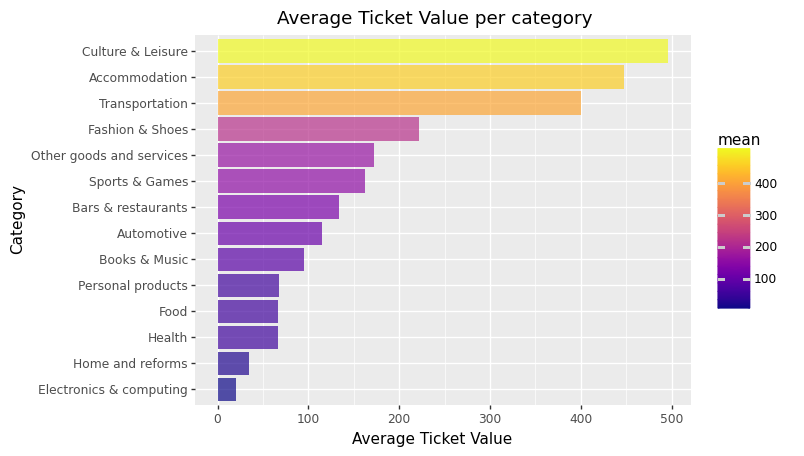

<ggplot: (152390987939)>

In [235]:
ggplot(df9_pivot4, aes(x = 'reorder(category,mean)', y = 'mean', fill='mean'))\
    + geom_bar(stat="identity",alpha = 0.7)\
        + scale_x_discrete()\
            + coord_flip()\
                +scale_fill_cmap(cmap_name="plasma")\
                    + ggtitle("Average Ticket Value per category")\
                        +labs(y= "Average Ticket Value ", x = "Category")\
                            + guides(color=guide_legend(title='Avg Ticket Value'))

# Daily Purchase Habits

In [236]:
import plotly.express as px
fig = px.violin(df7_pivot3, y='category',x="hour", color = 'category', color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(orientation='h', side='positive', width=2, points=False)
fig.update_layout(title='Total Credit Card Expenditure per Purchase Category Type and Daytime',xaxis_showgrid=False, xaxis_zeroline=False, yaxis_title='Purchase Category',xaxis_range=[-5,30], xaxis_title='Hour', xaxis = dict(tickmode='linear', tick0=0, dtick=2), yaxis = dict(tickmode='linear'), showlegend=False, width=700, height=500,violinmode='group')
fig.show()

In [237]:
df_china= df.loc[df['customer_country'] == 'CN']
df_china = df_china.loc[(df_china['category'] == 'Fashion & Shoes') | (df_china['category'] == 'Accommodation') | (df_china['category'] == 'Bars & restaurants') | (df_china['category'] == 'Personal products') | (df_china['category'] == 'Other good and services') | (df_china['category'] == 'Food') | (df_china['category'] == 'Health')| (df_china['category'] == 'Transportation') ]
df_china

amount            category customer_country      daytime  hour  \
848    49.99     Fashion & Shoes               CN      Evening    17   
849   155.62       Accommodation               CN    Afternoon    14   
850    23.98       Accommodation               CN  Mid morning     9   
851   865.90       Accommodation               CN  Mid morning    11   
852    23.90     Fashion & Shoes               CN  Mid morning    11   
...      ...                 ...              ...          ...   ...   
1211   12.55  Bars & restaurants               CN    Afternoon    12   
1213   17.42              Health               CN    Afternoon    16   
1214   90.15       Accommodation               CN  Mid morning     9   
1215    5.60  Bars & restaurants               CN      Evening    18   
1216  452.55  Bars & restaurants               CN    Afternoon    15   

                  tx_date_proc    weekday Continent_Name Continent_Code  \
848  2012-03-02 17:34:01+00:00  friday              Asia             AS   
849  2012-03-02 14:11:22+00:00  friday              Asia             AS   
850  2012-03-02 09:32:47+00:00  friday              Asia             AS   
851  2012-03-02 11:07:45+00:00  friday              Asia             AS   
852  2012-03-01 11:08:40+00:00  thursday            Asia             AS   
...                        ...        ...            ...            ...   
1211 2012-03-01 12:16:57+00:00  thursday            Asia             AS   
1213 2012-03-01 16:28:28+00:00  thursday            Asia             AS   
1214 2012-03-02 09:57:36+00:00  friday              Asia             AS   
1215 2012-03-02 18:47:36+00:00  friday              Asia             AS   
1216 2012-03-01 15:27:26+00:00  thursday            Asia             AS   

     Country_Name Two_Letter_Country_Code Three_Letter_Country_Code  \
848         China                      CN                       CHN   
849         China                      CN                       CHN   
850         China                      CN                       CHN   
851         China                      CN                       CHN   
852         China                      CN                       CHN   
...           ...                     ...                       ...   
1211        China                      CN                       CHN   
1213        China                      CN                       CHN   
1214        China                      CN                       CHN   
1215        China                      CN                       CHN   
1216        China                      CN                       CHN   

      Country_Number         Day      Time  
848            156.0  2012-03-02  17:34:01  
849            156.0  2012-03-02  14:11:22  
850            156.0  2012-03-02  09:32:47  
851            156.0  2012-03-02  11:07:45  
852            156.0  2012-03-01  11:08:40  
...              ...         ...       ...  
1211           156.0  2012-03-01  12:16:57  
1213           156.0  2012-03-01  16:28:28  
1214           156.0  2012-03-02  09:57:36  
1215           156.0  2012-03-02  18:47:36  
1216           156.0  2012-03-01  15:27:26  

[362 rows x 15 columns]

In [293]:
fig = px.violin(df_china , y='category',x="amount", color = 'category', color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(orientation='h', side='positive', width=1.5, points=False,spanmode ='hard')
fig.update_layout(title='Figure 9. China Total Expenses Distribution by Category',xaxis_showgrid=False, xaxis_zeroline=False, yaxis_title='Category', xaxis_title='Total Expenses', yaxis = dict(tickmode='linear'), showlegend=False, width=1000, height=400,violinmode='group')
fig.show()

In [239]:
list_Top_10_Exp =['US','GB','CN','FR','JP','FI','RU','IT','SE','BR']
df_Top_10_Exp = df7_pivot2[df7_pivot2['customer_country'].isin(list_Top_10_Exp)]

In [240]:
fig = px.violin(df_Top_10_Exp , y='customer_country',x="amount", color = 'customer_country', color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(orientation='h', side='positive', width=2, points=False,spanmode ='hard')
fig.update_layout(title='Top 10 Countries based on Total Expenditure: Total Expenses Distribution',xaxis_showgrid=False, xaxis_zeroline=False, yaxis_title='Top 10 Countries based on Total Expenditure', xaxis_title='Total Expenses', yaxis = dict(tickmode='linear'), showlegend=False, width=700, height=500,violinmode='group')
fig.show()

In [241]:
df12 = pd.merge(left=df, right=df_sorted[['Country_Name','Total_Expenditure']], on ='Country_Name', how ='left')
df12['Total_Expenditure'].fillna('Other', inplace=True)
df12['Total_Expenditure'] = np.where(df12['Total_Expenditure'] != 'Other', df12['Country_Name'], 'Other')
df12.rename(columns = {'Total_Expenditure':'Top_Expenditure'}, inplace = True)

In [242]:
df12_pivot = pd.pivot_table(df12, index=['customer_country', 'hour'], values='amount', aggfunc=['sum']).reset_index()
df12_pivot1 = df12_pivot.reset_index()
df12_pivot1.columns = ['id','customer_country', 'hour', 'amount']

In [243]:
list_Top_10_Avg =['VN','TH','SA','ID','AO','MY','TT','TW','AE','SN']
df_Top_10_Avg = df12_pivot1[df12_pivot1['customer_country'].isin(list_Top_10_Avg)]

In [244]:
fig = px.violin(df_Top_10_Avg , y='customer_country',x="amount", color = 'customer_country', color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(orientation='h', side='positive', width=2, points=False,spanmode ='hard')
fig.update_layout(title='Top 10 Countries based on Avg Ticket: Total Expenses Distribution',xaxis_showgrid=False, xaxis_zeroline=False, yaxis_title='Top 10 Countries based on Avg Ticket', xaxis_title='Total Expenses', yaxis = dict(tickmode='linear'), showlegend=False, width=700, height=500,violinmode='group')
fig.show()

In [245]:
df_pivot11 = pd.pivot_table(df, index=['category','daytime'], values='amount', aggfunc=['sum']).reset_index()
df11 = df_pivot11.reset_index()
df11.columns = ['id','category', 'daytime','sum_amount']

In [246]:
import plotly.express as px
fig = px.parallel_categories(df11, dimensions=['category','daytime'], color='sum_amount',color_continuous_scale= px.colors.sequential.Plasma)
fig.show()

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



### Sankey Diagram

In [247]:
# Helper function to transform regular data to sankey format
# Returns data and layout as dictionary
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [248]:
df_pivot13 = pd.pivot_table(df, index=['customer_country','category','daytime'], values='amount', aggfunc=['sum']).reset_index()
df13 = df_pivot13.reset_index()
df13.columns = ['id','customer_country','category', 'daytime','sum_amount']

In [249]:
# Generating regular sankey diagram
sank = genSankey(df13,cat_cols=['customer_country','category','daytime'],value_cols='sum_amount',title='Merchant Transactions by Day Time')
fig = go.Figure(sank)
iplot(fig)

In [250]:
# Generating DFs for different filter options
VN = genSankey(df13[df13['customer_country']=='VN'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
TW = genSankey(df13[df13['customer_country']=='TW'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
TT = genSankey(df13[df13['customer_country']=='TT'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
TH = genSankey(df13[df13['customer_country']=='TH'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
SN = genSankey(df13[df13['customer_country']=='SN'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
SA = genSankey(df13[df13['customer_country']=='SA'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
MY = genSankey(df13[df13['customer_country']=='MY'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
ID = genSankey(df13[df13['customer_country']=='ID'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
AO = genSankey(df13[df13['customer_country']=='AO'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
AE = genSankey(df13[df13['customer_country']=='AE'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
US = genSankey(df13[df13['customer_country']=='US'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
FR = genSankey(df13[df13['customer_country']=='FR'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
RU = genSankey(df13[df13['customer_country']=='RU'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
GB = genSankey(df13[df13['customer_country']=='GB'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
BR = genSankey(df13[df13['customer_country']=='BR'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
CN = genSankey(df13[df13['customer_country']=='CN'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
JP = genSankey(df13[df13['customer_country']=='JP'],cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
all = genSankey(df13,cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')


# Constructing menus
updatemenus = [{'buttons': [{'method': 'animate','label': 'All','args': [all]},
                            {'method': 'animate','label': 'Vietnam','args': [VN]},
                            {'method': 'animate','label': 'Taiwan','args': [TW]},
                            {'method': 'animate','label': 'Trinidad and Tobago','args': [TT]},
                            {'method': 'animate','label': 'Vietnam','args': [TH]},
                            {'method': 'animate','label': 'Thailand','args': [SN]},
                            {'method': 'animate','label': 'Saudi Arabia','args': [SA]},
                            {'method': 'animate','label': 'Malesya','args': [MY]},
                            {'method': 'animate','label': 'Indonesia','args': [ID]},
                            {'method': 'animate','label': 'Angola','args': [AO]},
                            {'method': 'animate','label': 'United Arab Emirates','args': [AE]},
                            {'method': 'animate','label': 'United States','args': [US]},
                            {'method': 'animate','label': 'France','args': [FR]},
                            {'method': 'animate','label': 'Russia','args': [RU]},
                            {'method': 'animate','label': 'United Kingdom','args': [GB]},
                            {'method': 'animate','label': 'Brazil','args': [BR]},
                            {'method': 'animate','label': 'China','args': [CN]},
                            {'method': 'animate','label': 'Japon','args': [JP]},
                            ] } ]

# update layout with buttons, and show the figure
sank = genSankey(df13,cat_cols=['customer_country','daytime','category'],value_cols='sum_amount',title='Merchant Transactions by Day Time')
fig = go.Figure(sank)
fig.update_layout(updatemenus=updatemenus, width=700, height=500)
fig.update_layout(
)
iplot(fig)

# Use dropdown below to interact with the plot

In [251]:
# Generating DFs for different filter options
Fashion = genSankey(df13[df13['category']=='Fashion & Shoes'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Bar = genSankey(df13[df13['category']=='Bar & restaurants'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Health = genSankey(df13[df13['category']=='Health'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Accomodation = genSankey(df13[df13['category']=='Accomodation'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Transportation = genSankey(df13[df13['category']=='Transportation'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Food = genSankey(df13[df13['category']=='Food'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Other = genSankey(df13[df13['category']=='Other goods and services'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Sport = genSankey(df13[df13['category']=='Sport & Games'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Personal = genSankey(df13[df13['category']=='Personal Products'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Home = genSankey(df13[df13['category']=='Home and reforms'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Culture = genSankey(df13[df13['category']=='Culture a& Leasure'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Electronics = genSankey(df13[df13['category']=='Electronics & Computing'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Books = genSankey(df13[df13['category']=='Books & Music'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Travel = genSankey(df13[df13['category']=='Travel Agency'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
Automotive = genSankey(df13[df13['category']=='Automotive'],cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
all = genSankey(df13,cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')

# Constructing menus
updatemenus = [{'buttons': [{'method': 'animate','label': 'All','args': [all]},
                            {'method': 'animate','label': 'Fashion & Shoes','args': [Fashion]},
                            {'method': 'animate','label': 'Bar & restaurants','args': [Bar]},
                            {'method': 'animate','label': 'Health','args': [Health]},
                            {'method': 'animate','label': 'Accomodation','args': [Accomodation]},
                            {'method': 'animate','label': 'Transportation','args': [Transportation]},
                            {'method': 'animate','label': 'Food','args': [Food]},
                            {'method': 'animate','label': 'Other goods and services','args': [Other]},
                            {'method': 'animate','label': 'Sport & Games','args': [Sport]},
                            {'method': 'animate','label': 'Personal Products','args': [Personal]},
                            {'method': 'animate','label': 'Home and reforms','args': [Home]},
                            {'method': 'animate','label': 'Culture and Leasure','args': [Culture]},
                            {'method': 'animate','label': 'Electronics and Computing','args': [Electronics]},
                            {'method': 'animate','label': 'Books and Music','args': [Books]},
                            {'method': 'animate','label': 'Travel Agency','args': [Travel]},
                            {'method': 'animate','label': 'Automotive','args': [Automotive]},
                            ] } ]

# update layout with buttons, and show the figure
sank = genSankey(df13,cat_cols=['category','daytime','customer_country'],value_cols='sum_amount',title='Merchant Transactions by Day Time')
fig = go.Figure(sank)
fig.update_layout(updatemenus=updatemenus, width=700, height=500)
fig.update_layout(
)
iplot(fig)

# Use dropdown below to interact with the plot

In [252]:
# Generating DFs for different filter options
VN = genSankey(df13[df13['customer_country']=='VN'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
TW = genSankey(df13[df13['customer_country']=='TW'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
TT = genSankey(df13[df13['customer_country']=='TT'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
TH = genSankey(df13[df13['customer_country']=='TH'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
SN = genSankey(df13[df13['customer_country']=='SN'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
SA = genSankey(df13[df13['customer_country']=='SA'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
MY = genSankey(df13[df13['customer_country']=='MY'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
ID = genSankey(df13[df13['customer_country']=='ID'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
AO = genSankey(df13[df13['customer_country']=='AO'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
AE = genSankey(df13[df13['customer_country']=='AE'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
US = genSankey(df13[df13['customer_country']=='US'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
FR = genSankey(df13[df13['customer_country']=='FR'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
RU = genSankey(df13[df13['customer_country']=='RU'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
GB = genSankey(df13[df13['customer_country']=='GB'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
BR = genSankey(df13[df13['customer_country']=='BR'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
CN = genSankey(df13[df13['customer_country']=='CN'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
JP = genSankey(df13[df13['customer_country']=='JP'],cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')
all = genSankey(df13,cat_cols=['category','daytime'],value_cols='sum_amount',title='Country Expenditure by Merchant Transactions and Day Time')


# Constructing menus
updatemenus = [{'buttons': [{'method': 'animate','label': 'All','args': [all]},
                            {'method': 'animate','label': 'Vietnam','args': [VN]},
                            {'method': 'animate','label': 'Taiwan','args': [TW]},
                            {'method': 'animate','label': 'Trinidad and Tobago','args': [TT]},
                            {'method': 'animate','label': 'Vietnam','args': [TH]},
                            {'method': 'animate','label': 'Thailand','args': [SN]},
                            {'method': 'animate','label': 'Saudi Arabia','args': [SA]},
                            {'method': 'animate','label': 'Malesya','args': [MY]},
                            {'method': 'animate','label': 'Indonesia','args': [ID]},
                            {'method': 'animate','label': 'Angola','args': [AO]},
                            {'method': 'animate','label': 'United Arab Emirates','args': [AE]},
                            {'method': 'animate','label': 'United States','args': [US]},
                            {'method': 'animate','label': 'France','args': [FR]},
                            {'method': 'animate','label': 'Russia','args': [RU]},
                            {'method': 'animate','label': 'United Kingdom','args': [GB]},
                            {'method': 'animate','label': 'Brazil','args': [BR]},
                            {'method': 'animate','label': 'China','args': [CN]},
                            {'method': 'animate','label': 'Japon','args': [JP]},
                            ] } ]

# update layout with buttons, and show the figure
sank = genSankey(df13,cat_cols=['category','daytime'],value_cols='sum_amount',title='Merchant Transactions by Day Time')
fig = go.Figure(sank)
fig.update_layout(updatemenus=updatemenus, width=700, height=500)
fig.update_layout(
)
iplot(fig)

# Use dropdown below to interact with the plot

In [253]:
import plotly.express as px
import pandas as pd

fig= px.bar_polar(df11, r="sum_amount", theta = "category",
                 color = "daytime", template = "ggplot2",
                 color_discrete_sequence = px.colors.sequential.Plasma_r)
fig.update_layout(
    title='Total Credit Card Expenditure per Purchase Category Type and Daytime',
    font_size=12,
    legend_font_size=12,
    width=800, 
    height=500
)
fig.show()

### Targeting our Market

#### Transaction Volume v.s. Total Expenditure

In [284]:
conditions = [
    (df6['Total_Expenditure'] >= 9400) & (df6['Total_Transactions'] >= 6.5),
    (df6['Total_Expenditure'] < 9400) & (df6['Total_Transactions'] >= 6.5),
    (df6['Total_Transactions'] < 6.5)
    ]

# create a list of the values we want to assign for each condition
values = ['Tier 1', 'Tier 2', 'Tier 3']

In [285]:
df6['Tier'] = np.select(conditions, values)

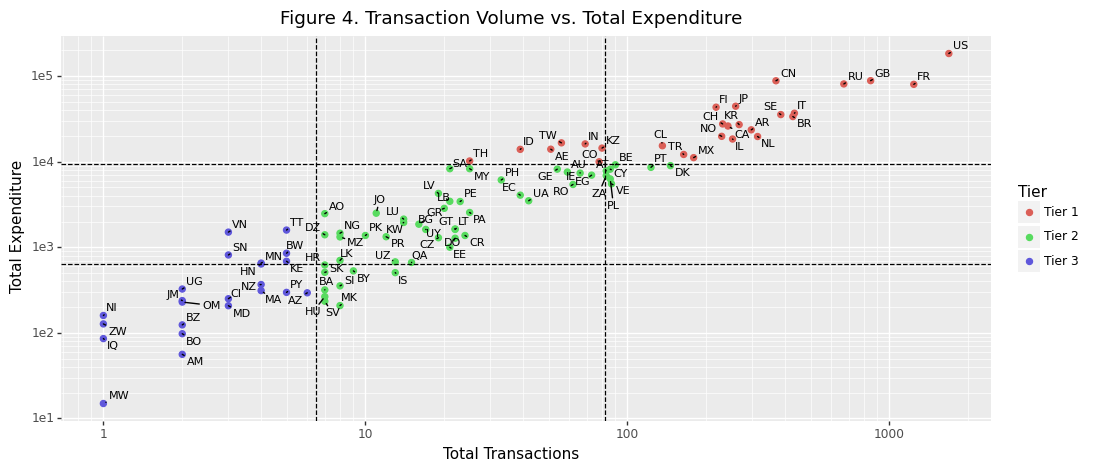

<ggplot: (152391114614)>

In [286]:
from adjustText import adjust_text
ggplot(df6 , aes(x='Total_Transactions', y='Total_Expenditure'))+\
    geom_point(aes(color='Tier'), size = 2)+\
      scale_x_continuous(trans='log10')+\
        scale_y_continuous(trans='log10')+\
          ggtitle("Figure 4. Transaction Volume vs. Total Expenditure")+\
            geom_text(aes(label="customer_country"), colour = "black", size = 8, nudge_y=0.2, show_legend=False, adjust_text={'expand_points': (1.5, 1.5), 'arrowprops': {'arrowstyle': '-'}})+\
              geom_hline(yintercept=9400, linetype="dashed", color = "black")+\
                geom_hline(yintercept=630, linetype="dashed", color = "black")+\
                  geom_vline(xintercept=82.25, linetype="dashed", color = "black")+\
                    geom_vline(xintercept=6.5, linetype="dashed", color = "black")+\
                      labs(y= "Total Expenditure", x = "Total Transactions")+\
                        theme(figure_size=(12, 5)) 

<a id='4'></a>
# <font color=black> 4. Annex </font>

<a id='4.1'></a>
## <font color=black> 4.1 Treemaps </font>